<a href="https://colab.research.google.com/github/zrsteff/CSC587/blob/main/Lab%2013%20-%20lab_hiearchicalclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

from sklearn.cluster import AgglomerativeClustering #Scikit-learn version

# Generate a random dataset
np.random.seed(123)
data_matrix = np.random.randn(10, 10)  # 10 samples, 10 features

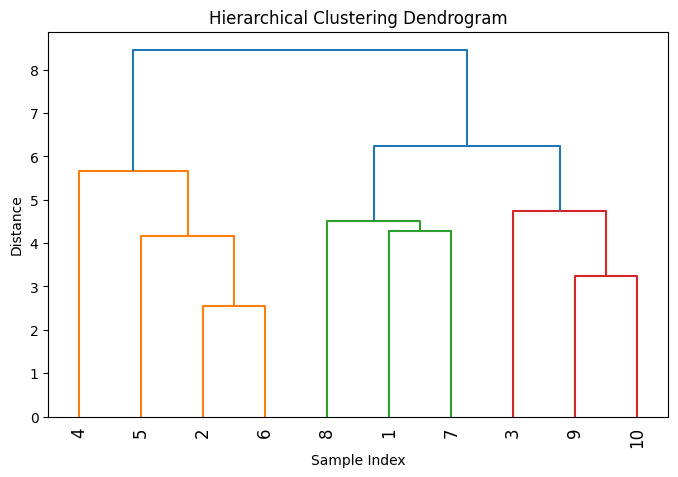

In [6]:
# Perform hierarchical clustering using Scikit-learn
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = model.fit_predict(data_matrix)

# Compute linkage matrix for dendrogram
linkage_matrix = linkage(data_matrix, method='ward')

# Plot dendrogram
plt.figure(figsize=(8, 5))
dendrogram(linkage_matrix, labels=np.arange(1, 11), leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [7]:
print(labels)

[2 0 1 0 0 0 2 2 1 1]


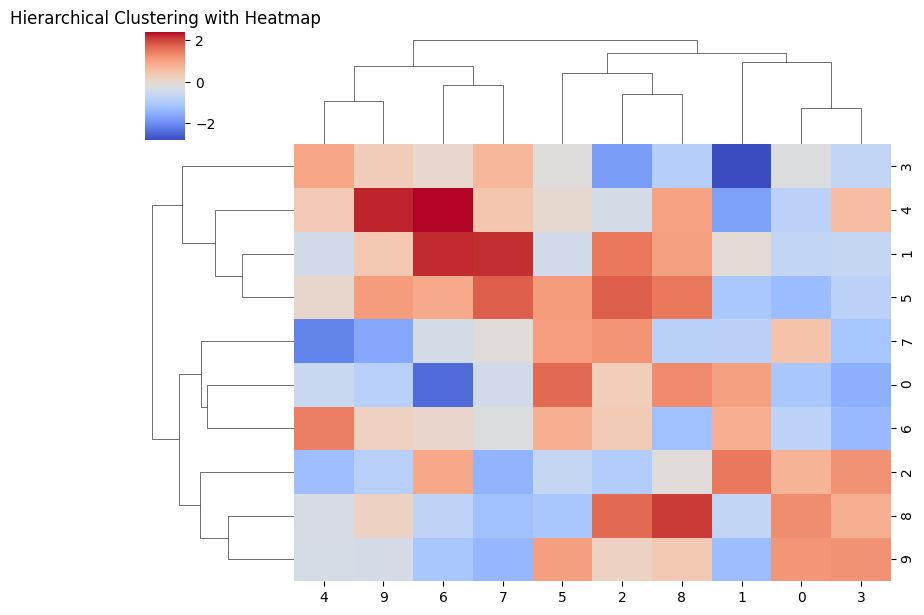

In [8]:




# Compute hierarchical clustering
row_linkage = linkage(pdist(data_matrix), method='complete')

# Create a heatmap with hierarchical clustering
sns.clustermap(data_matrix,
               method='complete',
               metric='euclidean',
               cmap="coolwarm",
               figsize=(8, 6))
plt.title("Hierarchical Clustering with Heatmap")
plt.show()

In [9]:
import pandas as pd
#please read log_top_counts_nash.csv from the DATA folder and make sure that you reset your index to the first column which goes by "Genes"
#use head() to make sure you have Genes set index (gene names should work like rownames in R)



In [15]:
import pandas as pd

file_path = '/content/drive/MyDrive/DATA/log_top_counts_nash.csv'

df_nash = pd.read_csv(file_path, index_col='Genes')
print(f"Successfully loaded data from {file_path}")
display(df_nash.head())


Successfully loaded data from /content/drive/MyDrive/DATA/log_top_counts_nash.csv


,C_S27,C_S28,C_S31,C_S43,C_S48,N_S29,N_S30,N_S37,N_S38,N_S46
Genes,,,,,,,,,,
MYH4,0.000000,0.000000,1.330235,0.000000,1.101345,7.592200,8.363149,0.000000,2.151516,1.956310
LINC01595,2.157668,3.625286,4.657125,1.927655,4.889408,4.472845,9.460346,9.281353,12.170895,5.762683
X,1.449411,0.675228,0.000000,0.000000,1.718566,2.944198,1.754675,2.888432,6.720223,4.750935
CD300LG,1.449411,1.133365,0.813294,3.434998,1.718566,5.855990,6.837722,0.000000,4.582132,5.600842
CDH15,1.449411,1.480548,3.334371,0.000000,0.000000,5.011237,3.686222,3.406941,4.582132,6.964275


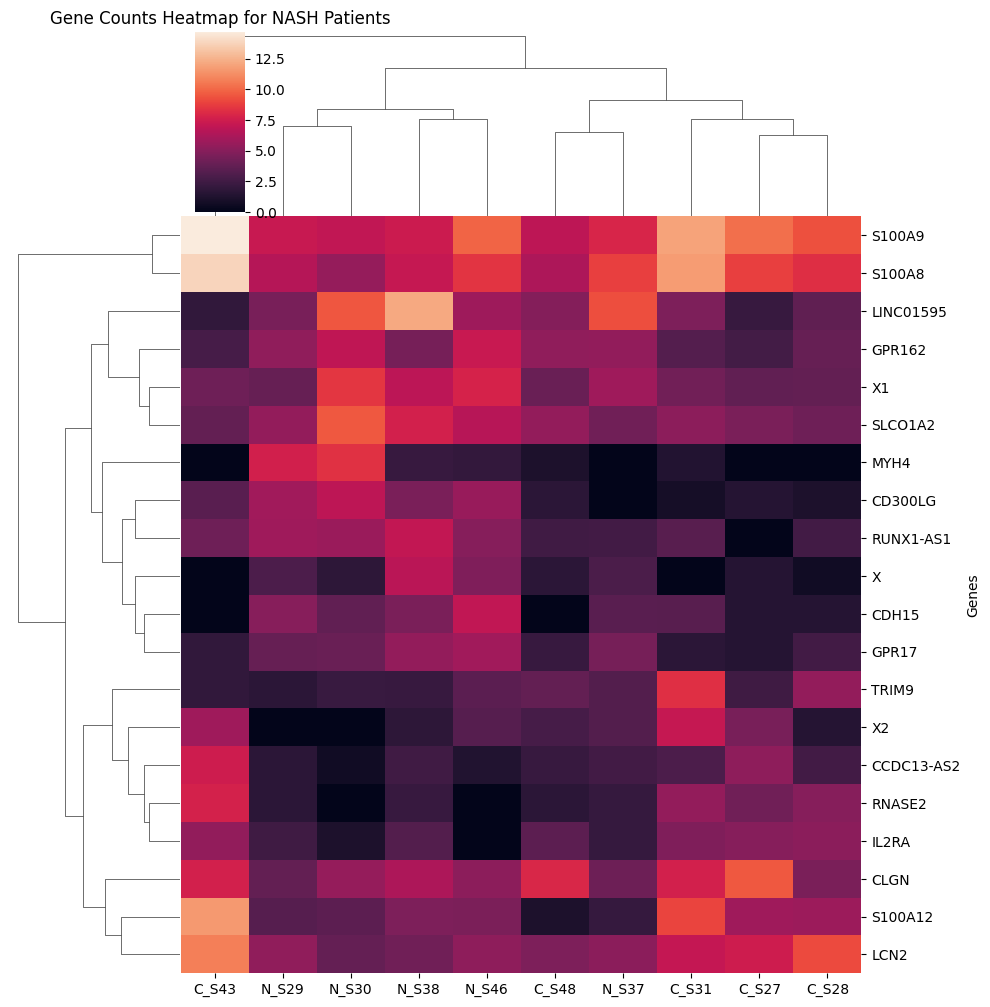

In [22]:
#please use seaborns clustermap feature to create a heatmap for gene counts from the NASH patients.
sns.clustermap(df_nash,
               figsize=(10, 10),
               cbar_pos=(0.2, 0.8, 0.05, 0.18))
plt.title("Gene Counts Heatmap for NASH Patients")
plt.show()